In [1]:
import os, time

import numpy as np

from tvb.simulator.lab import *
from tvb.simulator.backend.nb_mpr import NbMPRBackend

import matplotlib.pyplot as plt

In [2]:
# loading human connectome from Human Connectome Project (HCP) in TVB format
conn = connectivity.Connectivity().from_file(
    os.path.abspath('hcp-001.zip')
)

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


In [3]:
# normalization of the weights
conn.weights = np.log(np.maximum(conn.weights, conn.weights.max()*1e-4))
conn.weights /= conn.weights.max()

(array([3476.,  538.,  592.,  598.,  578.,  504.,  312.,  214.,  192.,
          52.]),
 array([-0.01527515,  0.08625236,  0.18777988,  0.28930739,  0.39083491,
         0.49236242,  0.59388994,  0.69541745,  0.79694497,  0.89847248,
         1.        ]),
 <BarContainer object of 10 artists>)

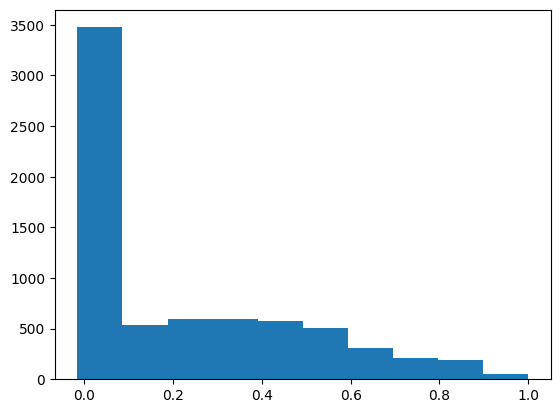

In [4]:
plt.hist(conn.weights.flatten())

In [5]:
# The majority of the connectivity weights are concentrated in the first bin, 
# indicating that most connections have very low weights.
# As the weight value increases, the frequency of connections decreases.

# This is typical in many brain connectivity datasets, where a few strong connections
# coexist with a large number of weak ones.

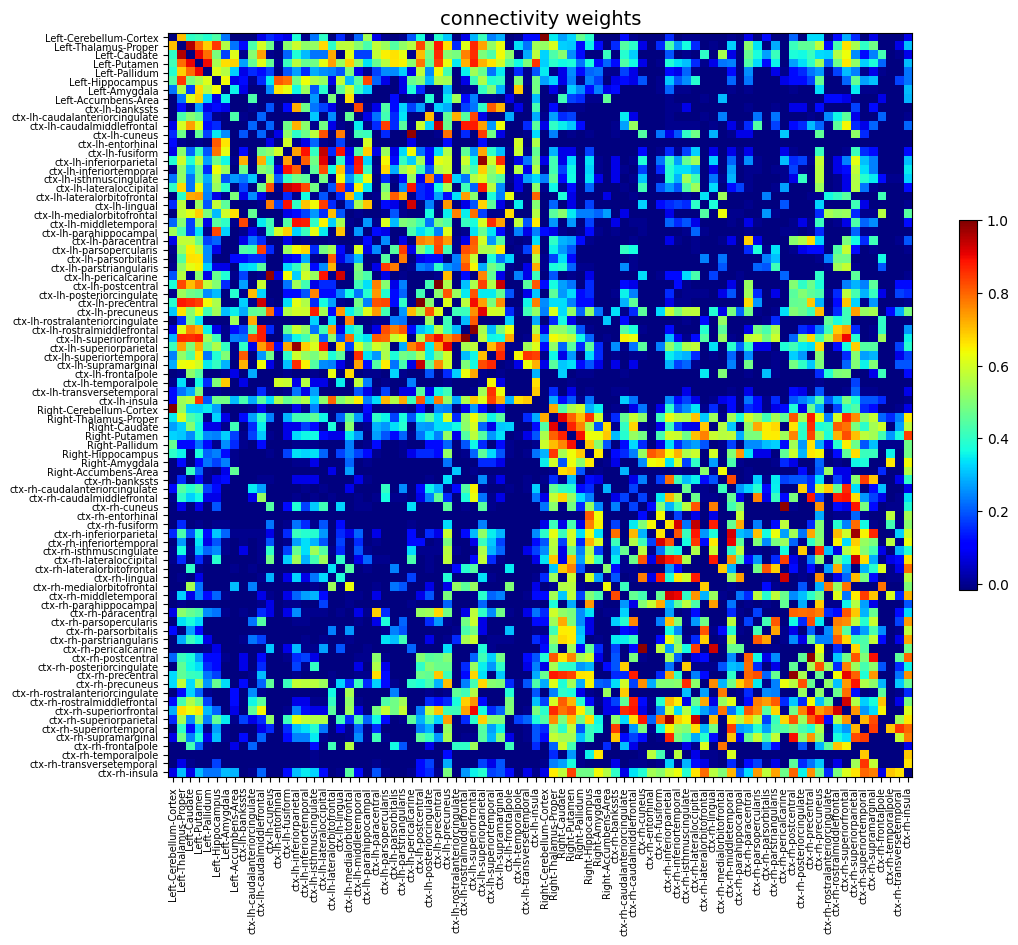

In [6]:
# plotting connectivity matrix

N = conn.region_labels.size

plt.figure(figsize=[12,12])
plt.imshow(conn.weights, interpolation='nearest', aspect='equal', cmap='jet')
plt.xticks(range(0, N), conn.region_labels, fontsize=7, rotation=90)
plt.yticks(range(0, N), conn.region_labels, fontsize=7)
plt.colorbar(shrink=0.4)
plt.title('connectivity weights', fontsize=14)
plt.show()

In [7]:
 print('number of regions:', conn.number_of_regions)
print('region labels:', conn.region_labels) # here ctx stands for cortex, lh/rh for left/right hemisphere

number of regions: 0
region labels: ['Left-Cerebellum-Cortex' 'Left-Thalamus-Proper' 'Left-Caudate'
 'Left-Putamen' 'Left-Pallidum' 'Left-Hippocampus' 'Left-Amygdala'
 'Left-Accumbens-Area' 'ctx-lh-bankssts' 'ctx-lh-caudalanteriorcingulate'
 'ctx-lh-caudalmiddlefrontal' 'ctx-lh-cuneus' 'ctx-lh-entorhinal'
 'ctx-lh-fusiform' 'ctx-lh-inferiorparietal' 'ctx-lh-inferiortemporal'
 'ctx-lh-isthmuscingulate' 'ctx-lh-lateraloccipital'
 'ctx-lh-lateralorbitofrontal' 'ctx-lh-lingual'
 'ctx-lh-medialorbitofrontal' 'ctx-lh-middletemporal'
 'ctx-lh-parahippocampal' 'ctx-lh-paracentral' 'ctx-lh-parsopercularis'
 'ctx-lh-parsorbitalis' 'ctx-lh-parstriangularis' 'ctx-lh-pericalcarine'
 'ctx-lh-postcentral' 'ctx-lh-posteriorcingulate' 'ctx-lh-precentral'
 'ctx-lh-precuneus' 'ctx-lh-rostralanteriorcingulate'
 'ctx-lh-rostralmiddlefrontal' 'ctx-lh-superiorfrontal'
 'ctx-lh-superiorparietal' 'ctx-lh-superiortemporal'
 'ctx-lh-supramarginal' 'ctx-lh-frontalpole' 'ctx-lh-temporalpole'
 'ctx-lh-transversetem

In [8]:
# i and j are the indices used to access the specific connectivity weight between two regions!

# In connectivity matrix conn.weights, the element at position [0, 1] is the weight between 
# the region labeled by index 1 (Left-Thalamus-Proper) and the region labeled by index 0 (Left-Cerebellum-Cortex)

i = 0
j = 1
print('weight between {} and {}: {}'.format(conn.region_labels[j], conn.region_labels[i], conn.weights[i,j]))

weight between Left-Thalamus-Proper and Left-Cerebellum-Cortex: 0.7025444196550777


In [9]:
# Most connections have low weights, but the connection between 
# the Left-Thalamus-Proper and the Left-Cerebellum-Cortex is relatively strong.

# This strong connection might play a significant role in the brain's functional dynamics, 
# potentially influencing how stimulation in one of these regions might affect the other.

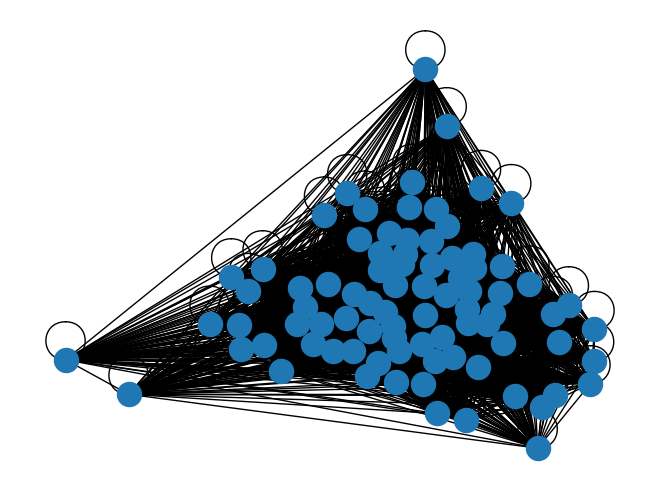

In [10]:
# creating a graph from the connectivity matrix
import networkx as nx
G = nx.Graph(conn.weights)
nx.draw(G)

In [14]:
# calculating node strength (sum of edge weights for each node)
node_strength = conn.weights.sum(axis=1)
# sorting nodes by node strength in descending order
nodes_sorted_by_strength = np.argsort(-node_strength)

In [15]:
# extracting the centrality values and node strengths in that order
degree_centrality = nx.degree_centrality(G)
sorted_centralities = np.array([degree_centrality[node] for node in nodes_sorted_by_strength])
sorted_strengths = np.sort(node_strength)[::-1]

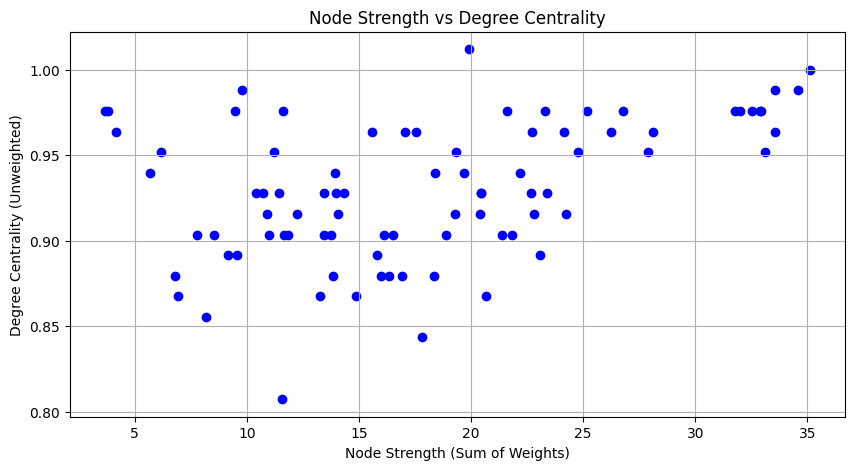

In [16]:
# plotting the centrality measure against node strength
plt.figure(figsize=(10, 5))
plt.scatter(sorted_strengths, sorted_centralities, c='blue')
plt.title('Node Strength vs Degree Centrality')
plt.xlabel('Node Strength (Sum of Weights)')
plt.ylabel('Degree Centrality (Unweighted)')
plt.grid(True)
plt.show()

In [11]:
# The fact that the degree centrality for many nodes is close to 1,
# suggests that this is a very dense network.

In [12]:
# Nodes with higher strength tend to have higher centrality, 
# which is expected since nodes with more connections or stronger connections are more central by definition.

In [13]:
# It's interesting to note that while degree centrality is consistently high
# for most nodes, their strengths vary. 
# This suggests that even though most nodes are connected to many other nodes, 
# the weights of these connections (and thus their strengths) can vary significantly.

In [14]:
#The nodes with high strength and high centrality may be considered 
# critical points of vulnerability in the network. 
#If these nodes were to be removed or their connection weights significantly altered,
#it might have a considerable impact on the network's overall connectivity and function.

In [17]:
# computing centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

In [18]:
# creating a feature matrix
nodes = list(G.nodes())
features = np.array([
    [degree_centrality[node], closeness_centrality[node], betweenness_centrality[node], eigenvector_centrality[node]]
    for node in nodes
])

In [19]:
# checkimg dimensionality
print(features.shape)

(84, 4)


In [20]:
# Curse of Dimensionality --> in order to properly cluster data i need to have max 3D

# Comparision of Clustering Algorithms

In [21]:
# lets aplly t-sne and then perform different clustering algorithms
# and check which one is better to preserve importand data

In [22]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# scalling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)


/Applications/tvb-2.7.2.app/Contents/Resources/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Applications/tvb-2.7.2.app/Contents/Resources/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans_clusters = kmeans.fit_predict(tsne_results)

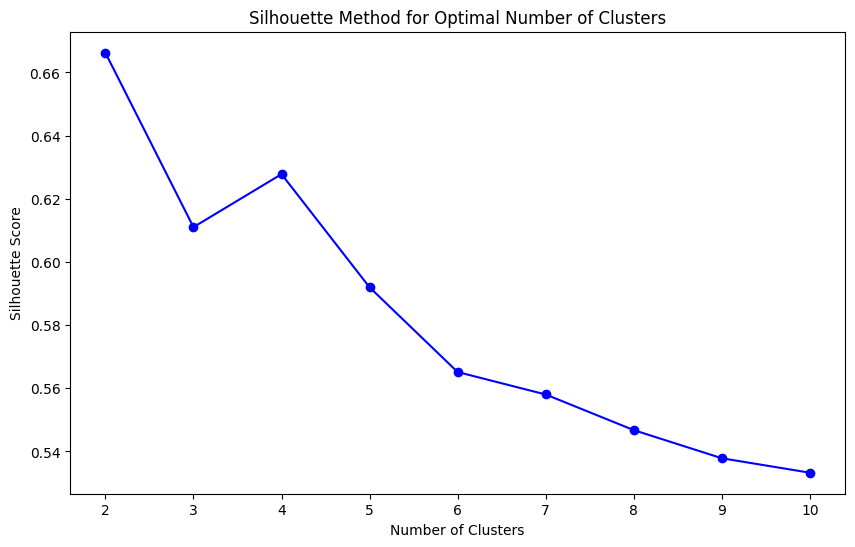

In [24]:
# K-means (how many clusters?)
from sklearn.metrics import silhouette_score

def silhouette_method(tsne_results, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(tsne_results)
        silhouette_scores.append(silhouette_score(tsne_results, labels))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal Number of Clusters')
    plt.show()

silhouette_method(tsne_results)

In [25]:
# Besides we have two distinct "populations" - from letft hemisphere and right hemisfere,
# so biologically best score for 2 clusters have a lot of sense

In [26]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan_clusters = dbscan.fit_predict(tsne_results)

# eps - radius of the circle to be created around each data point to check the density
# min_samples - the minimum number of data points in hight density area

In [27]:
# Aglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2)  
agglo_clusters = agglo.fit_predict(tsne_results)

In [28]:
# evaluating clustering algorithms

from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(tsne_results, kmeans_clusters)
silhouette_dbscan = silhouette_score(tsne_results, dbscan_clusters)
silhouette_agglo = silhouette_score(tsne_results, agglo_clusters)

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo}")

Silhouette Score for K-Means: 0.6662386059761047
Silhouette Score for DBSCAN: 0.2462441623210907
Silhouette Score for Agglomerative Clustering: 0.6675809025764465


In [29]:
# Silhouette Scores Interpretation
# -> k-means - relatively high, so clusters are well apart from each other and well defined
# -> DBSCAN - clusters identified by DBSCAN are not as distinct 
# -> agglomerative clustering - slightly higher than that of K-Means (best perfomance)

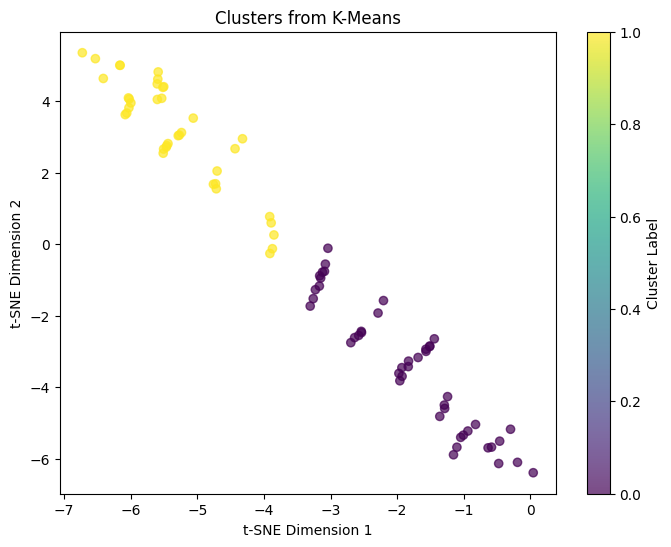

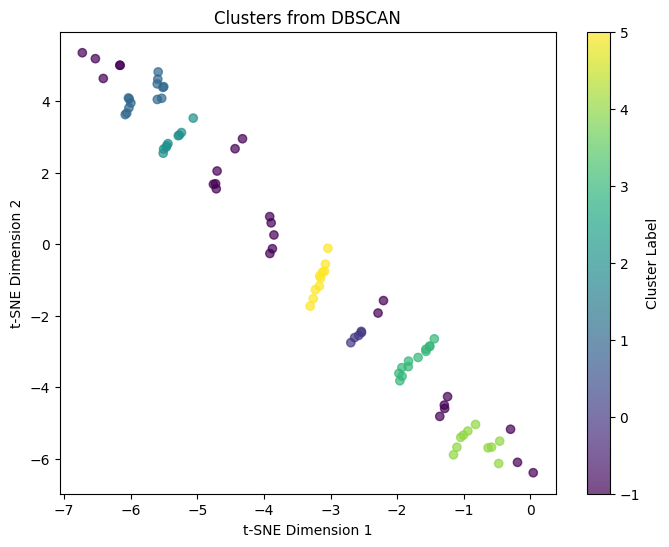

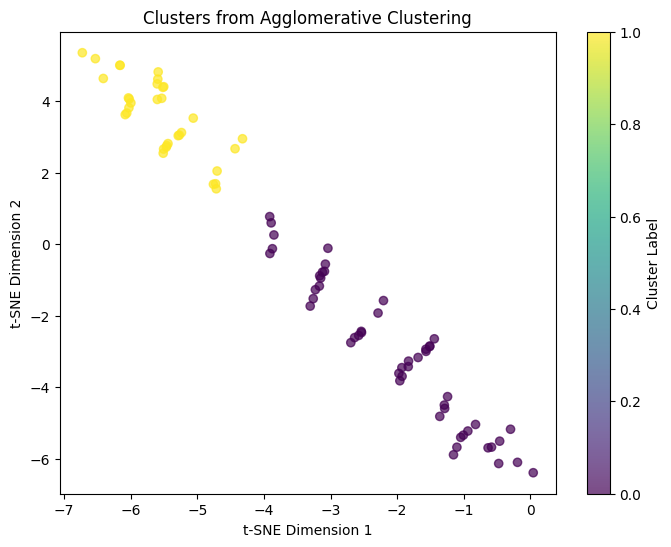

In [30]:
import matplotlib.pyplot as plt

def plot_clusters(results, clusters, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(results[:, 0], results[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plot each clustering result
plot_clusters(tsne_results, kmeans_clusters, 'Clusters from K-Means')
plot_clusters(tsne_results, dbscan_clusters, 'Clusters from DBSCAN')
plot_clusters(tsne_results, agglo_clusters, 'Clusters from Agglomerative Clustering')

In [31]:
# Since I know that DBSCAN have poor performance on my data set, 
# let's investigate futher kmeans_clusters and agglo clusters

# Quantative Evaluation of Clustering Algorithms

In [32]:
# Davies-Bouldin Index (DBI):
# evaluates the average similarity measure of each cluster with its most similar cluster. 
# (lower values indicate that the clusters are farther apart and more distinct)

In [33]:
# Calinski-Harabasz Index (CHI):
# ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters
# (higher values indicate clusters that are well-separated and dense)

In [34]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [35]:
# computing Davies-Bouldin Index (lower is better)
db_index_kmeans = davies_bouldin_score(tsne_results, kmeans_clusters)
db_index_agglo = davies_bouldin_score(tsne_results, agglo_clusters)

# computing Calinski-Harabasz Index (higher is better)
ch_index_kmeans = calinski_harabasz_score(tsne_results, kmeans_clusters)
ch_index_agglo = calinski_harabasz_score(tsne_results, agglo_clusters)

print(f"Davies-Bouldin Index for K-Means: {db_index_kmeans}")
print(f"Davies-Bouldin Index for Agglomerative Clustering: {db_index_agglo}")
print(f"Calinski-Harabasz Index for K-Means: {ch_index_kmeans}")
print(f"Calinski-Harabasz Index for Agglomerative Clustering: {ch_index_agglo}")

Davies-Bouldin Index for K-Means: 0.42326120532152
Davies-Bouldin Index for Agglomerative Clustering: 0.4052764022120078
Calinski-Harabasz Index for K-Means: 318.47039431380983
Calinski-Harabasz Index for Agglomerative Clustering: 294.07868569006604


In [36]:
# DBI
# Agglomerative Clustering has a slightly lower DBI, suggesting
# better separation and distinction between clusters compared to K-Means.

In [37]:
# CHI
# K-Means shows a higher CHI, indicating that its clusters are denser and better separated 
# compared to those formed by Agglomerative Clustering.

In [38]:
# Summary
# If priority is to have distinct clusters Agglomerative Clustering may be the better choice given its lower DBI.
# If priority is to have dense, tightly-packed clusters, K-Means may be better given its higher CHI.

# Corelation Analysis

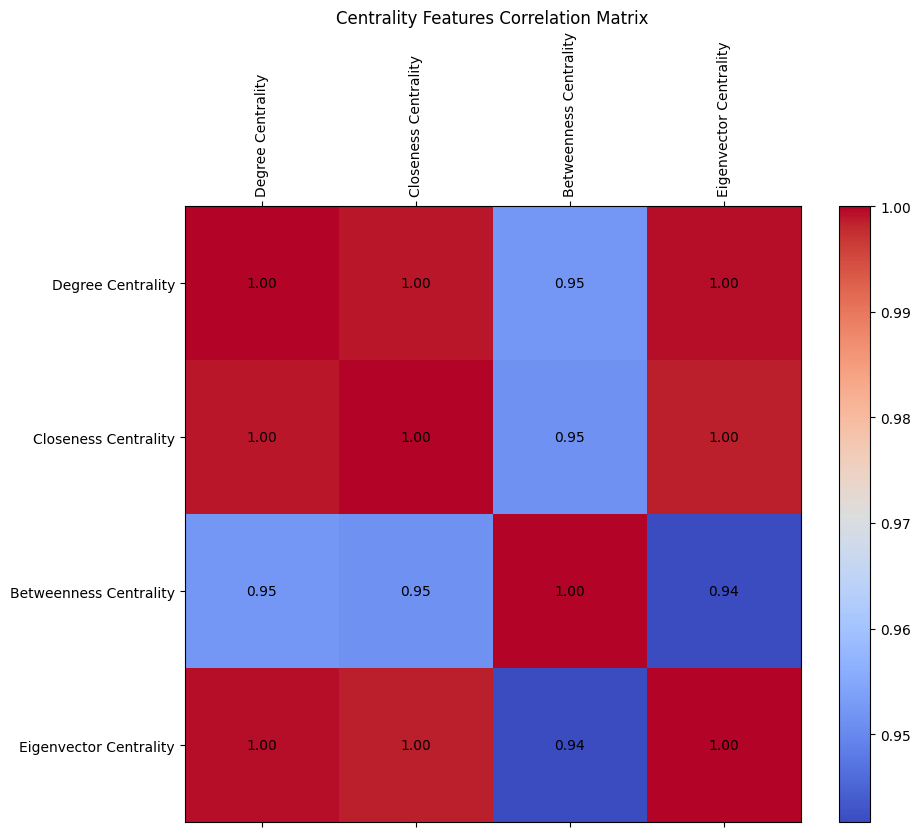

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# feature names
feature_names = ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']
df = pd.DataFrame(features, columns=feature_names)

# computing corealation matrix
correlation_matrix = df.corr()

# plotting correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

# setting up axis
ax.set_xticks(np.arange(len(feature_names)))
ax.set_yticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_yticklabels(feature_names)

# looping over data dimensions and creating text annotations
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.title('Centrality Features Correlation Matrix')
plt.show()

In [40]:
# Nodes that are highly connected (high degree centrality) also tend to be closer to
# all other nodes (high closeness centrality), act as key intermediaries (high betweenness centrality), 
# and are connected to other highly connected nodes (high eigenvector centrality).

# PCA Analysis

In [41]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

In [42]:
# applying PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(features_scaled)

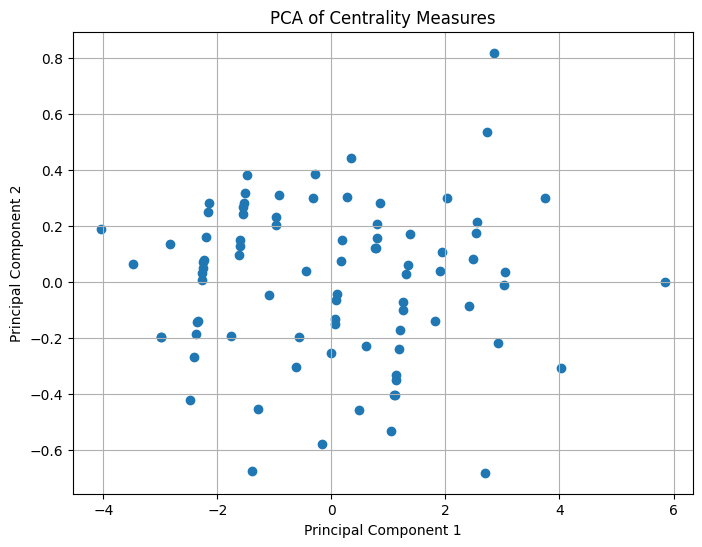

In [43]:
# creating plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Centrality Measures')
plt.grid(True)
plt.show()

In [44]:
# There does not appear to be clear clustering, suggesting that the nodes 
# might not group into distinct categories. Further analysis is needed - checking the PCA loadings to understand
# which centrality measures have the most influence on each principal component.

In [45]:
# examinating PCA loadings
loadings = pca.components_

# variance explained
explained_variance = pca.explained_variance_ratio_

for i, var_ratio in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {var_ratio:.2f} of total variance')

Principal Component 1: 0.98 of total variance
Principal Component 2: 0.02 of total variance


In [46]:
# The first principal component captures most of the variability in the centrality measures, 
# suggesting that this component alone provides a very good representation of the data.
# Despite that the PCA of centrality measures with loadings was made.

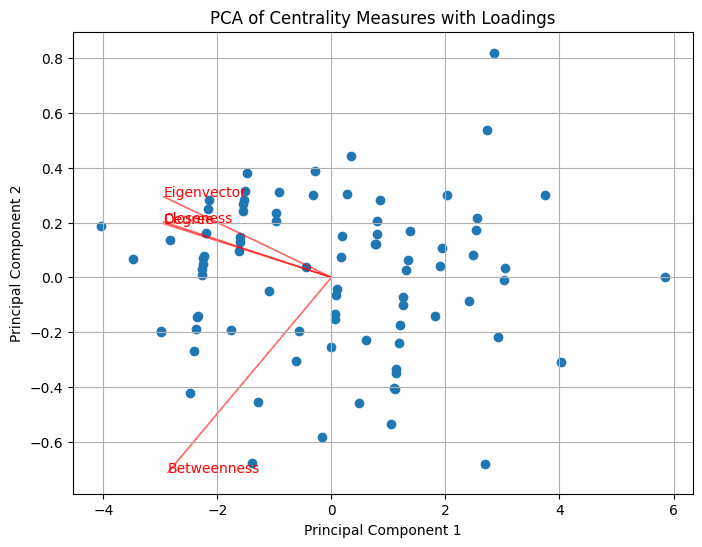

In [47]:
# plotting the loadings as vectors
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

for i, varname in enumerate(['Degree', 'Closeness', 'Betweenness', 'Eigenvector']):
    plt.arrow(0, 0, loadings[0, i]*max(principal_components[:, 0]), 
              loadings[1, i]*max(principal_components[:, 1]), color='r', alpha=0.5)
    plt.text(loadings[0, i]*max(principal_components[:, 0]), 
             loadings[1, i]*max(principal_components[:, 1]), varname, color='r')
    
# creating biplot, which combines the principal component scores of the nodes 
# with the loadings of the centrality measures.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Centrality Measures with Loadings')
plt.grid(True)
plt.show()

In [48]:
# Eigenvector and closeness centrality appear positively correlated 
# as their vectors are pointing in a similar direction, 
# whereas betweenness centrality is negatively correlated with
# both eigenvector and closeness centralities.

In [49]:
# Examinating PCA loadings
loadings = pca.components_.T

print("\nLoadings:")
for i, varname in enumerate(['Degree', 'Closeness', 'Betweenness', 'Eigenvector']):
    print(f"{varname}: PC1 = {loadings[i, 0]:.2f}, PC2 = {loadings[i, 1]:.2f}")


Loadings:
Degree: PC1 = -0.50, PC2 = 0.24
Closeness: PC1 = -0.50, PC2 = 0.25
Betweenness: PC1 = -0.49, PC2 = -0.87
Eigenvector: PC1 = -0.50, PC2 = 0.36


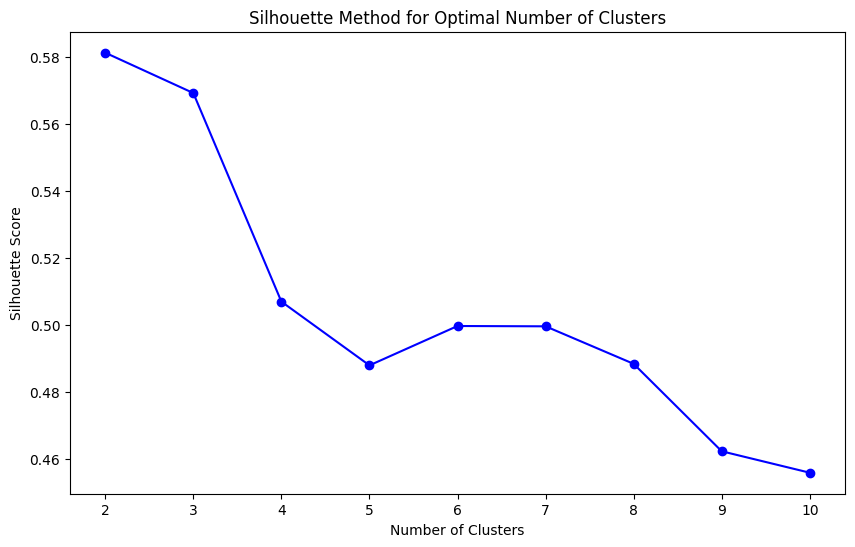

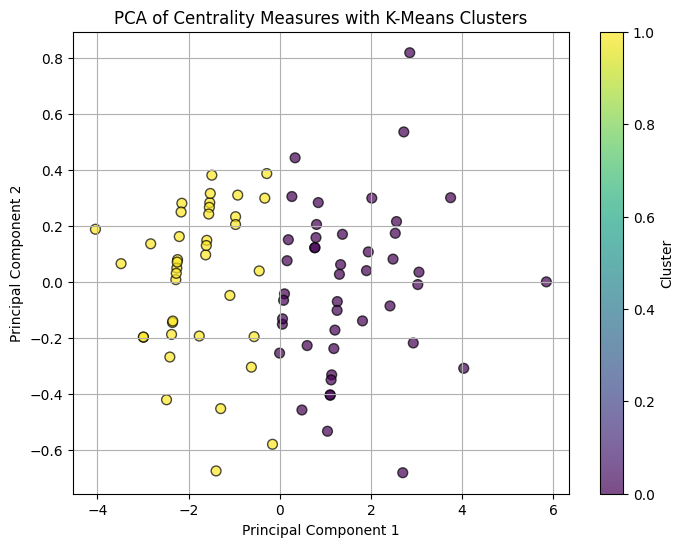

In [50]:
# how many clusters? (again)
def silhouette_method(principal_components, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(principal_components)
        silhouette_scores.append(silhouette_score(principal_components, labels))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal Number of Clusters')
    plt.show()

silhouette_method(principal_components)

# K-Means clustering 
optimal_clusters = 2  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# plotting the PCA results with clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Centrality Measures with K-Means Clusters')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [51]:
# creating a DataFrame with the original features and cluster labels
feature_names = ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']
df = pd.DataFrame(features, columns=feature_names)
df['Cluster'] = clusters

# calculating the mean values of centrality measures for each cluster
cluster_means = df.groupby('Cluster').mean()

print("Mean values of centrality measures for each cluster:")
print(cluster_means)

Mean values of centrality measures for each cluster:
         Degree Centrality  Closeness Centrality  Betweenness Centrality  \
Cluster                                                                    
0                 0.898260              0.888676                0.001052   
1                 0.966018              0.945373                0.001266   

         Eigenvector Centrality  
Cluster                          
0                      0.105331  
1                      0.113247  


In [ ]:
# PURPLE CLUSTER
# Nodes in the purple cluster appear to be more central and influential in the network due to their higher degree, 
# closeness, and eigenvector centralities. These nodes are highly interconnected and can quickly communicate 
# with the rest of the network. They might represent a core or highly connected hub within the network.

In [ ]:
# YELLOW CLUSTER
# Nodes in the yellow cluster are also well-connected but to a slightly lesser extent than those in the purple 
# cluster. They are still significant in terms of connectivity and proximity to other nodes but might be part of
# less dense or peripheral part of the network compared to the purple cluster.